In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tips.csv to tips.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


원본(kaggle) 주소 : https://www.kaggle.com/tasneemabdulrahim/tips-dataset

In [ ]:
pd.pivot_table(tips, index='day',
               columns='size',
               values='total_bill',
               aggfunc='count', fill_value = 0)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
# 빈도표
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
party_counts.apply(lambda r: r.argmax(), axis=1)

# 각 행을 해당 행의 총 합으로 나누어 정규화
pc_25 = party_counts.div(party_counts.sum(1), axis=0)

In [ ]:
new_var = pc_25.div(pc_25.sum(1), axis=0)
new_var

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


팁이 10이고 총 청구 금액이 100인 경우, 팁의 퍼센트를 마크업과 마진으로 계산한 결과는 다음과 같습니다:

마크업 (Markup): 약 11.11%
- 마크업은 기본 비용에 대한 추가 비용(여기서는 팁)의 비율
- Tip / (Total Bill - Tip) x 100

마진 (Margin): 10%
- 마진은 전체 판매 가격(여기서는 총 청구 금액)에 대한 추가 비용(팁)의 비율
- Tip / Total Bill x 100

마크업은 순수한 비용(총 금액에서 팁을 제외한 금액)에 대한 추가 비용의 비율을, 마진은 전체 금액에 대한 추가 비용의 비율

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<ipython-input-38-c8aecc2d8c73>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tip_pct', y='day', data=tips, orient='h', errorbar = None, width = 0.5, palette = 'Reds') # errorbar는 오차 막대 제어


<Axes: xlabel='tip_pct', ylabel='day'>

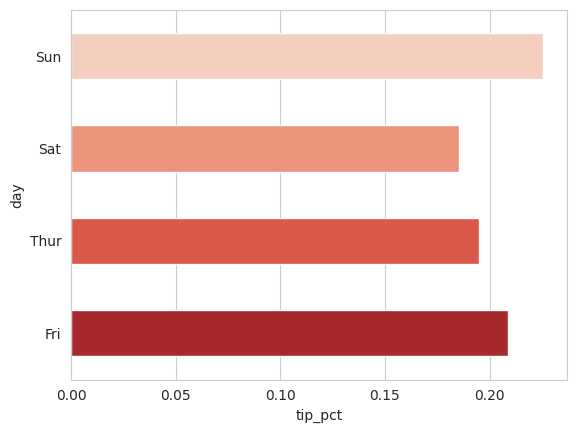

In [ ]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # tip 비중
print(tips.head())
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', errorbar = None, width = 0.5, palette = 'Reds') # errorbar는 오차 막대 제어

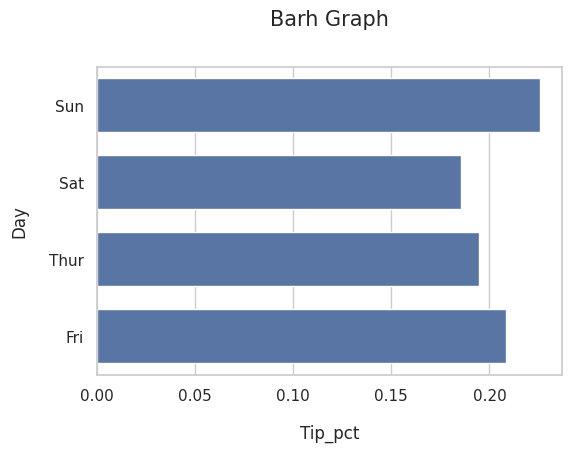

In [ ]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.set(style='whitegrid')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # tip 비중
# print(tips.head())
sns.barplot(x='tip_pct',y='day',data=tips, orient='h', errorbar=None, width=0.7) # errorbar는 오차 막대를 제어
plt.title('Barh Graph', pad=30, fontsize=15)
plt.xlabel('Tip_pct',labelpad=15,fontsize=12)
plt.ylabel('Day',labelpad=15,fontsize=12)
plt.show()

<Axes: xlabel='tip_pct', ylabel='day'>

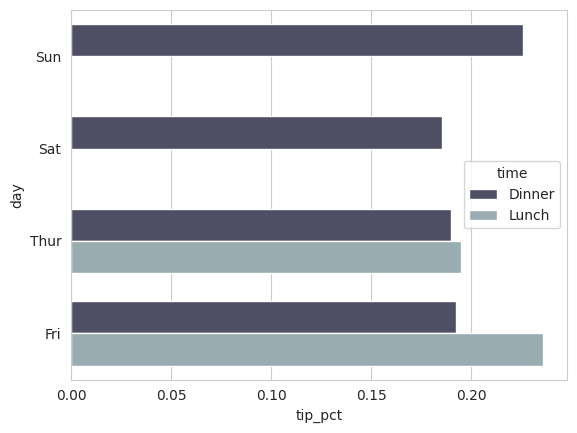

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h', errorbar = None, width = 0.7, palette='bone')

In [ ]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


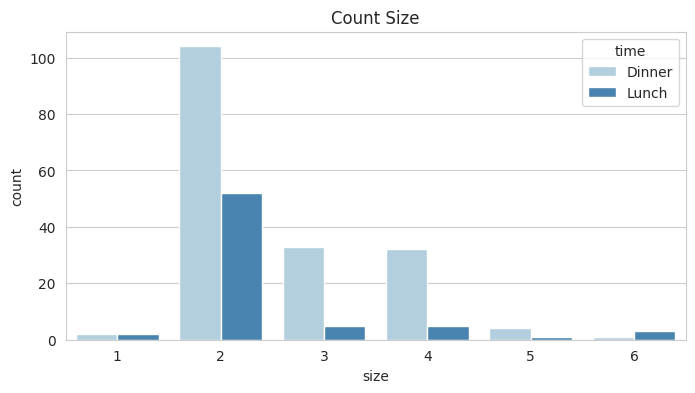

In [ ]:
# countplot()
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x = 'size', data=tips, hue='time', palette='Blues')
plt.title('Count Size')
plt.show()

In [ ]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [ ]:
import numpy as np

#np.random.normal(loc, scale, size) : 정규분포 난수 샘플
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
values.describe()

count    400.000000
mean       5.007822
std        5.267385
min       -2.906477
25%       -0.030426
50%        3.808814
75%       10.127801
max       15.003486
dtype: float64

In [ ]:
uploaded = files.upload()

Saving fm2.csv to fm2.csv


In [ ]:
# Q. 두개의 정규분포를 따르는 상이한 데이터 셋을 생성한 후 하나의 데이터 셋으로 병합 후 시각화하여 데이터 분포를 확인하시오.
fish_multi = pd.read_csv('fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


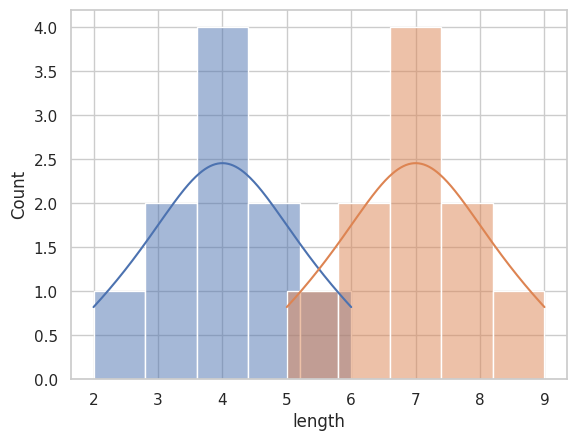

In [ ]:
length_a = fish_multi.query('species == "A"')['length']
length_b = fish_multi.query('species == "B"')['length']
sns.histplot(length_a, kde=True)
sns.histplot(length_b, kde=True)
plt.show()

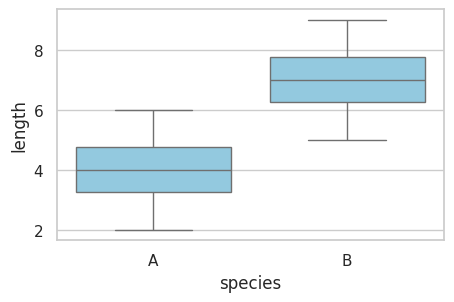

In [ ]:
#Q. box plot으로 A,B 비교
plt.figure(figsize=(5,3))
sns.boxplot(x='species', y='length', data=fish_multi, color ='skyblue')
plt.show()

<Axes: xlabel='species', ylabel='length'>

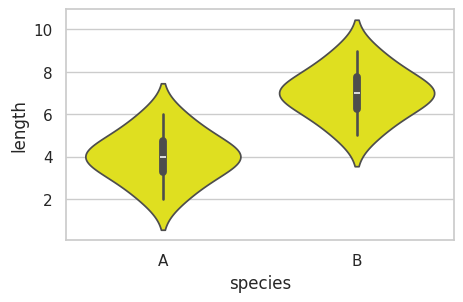

In [ ]:
# 바이올린 플롯 : 박스 플롯과 커널 밀도 추정을 결합한 형태로 데이터 형태를 좀 더 직관적으로 이해할 수 있게 해준다.
# 커널 밀도추정의 결과를 y축 방향에 추가하여 데이터가 퍼져있는 분산의 정도 파악
plt.figure(figsize=(5,3))
sns.violinplot(x='species', y='length', data=fish_multi, color='yellow')

<Axes: xlabel='species', ylabel='length'>

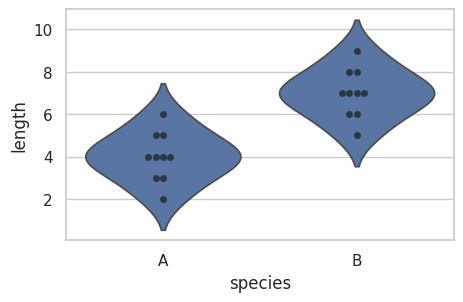

In [ ]:
plt.figure(figsize=(5,3))
sns.violinplot(x='species', y='length', data=fish_multi, inner=None)
sns.swarmplot(x='species', y='length', data=fish_multi, color='k', alpha=0.7)

In [ ]:
uploaded = files.upload()

Saving cov.csv to cov (1).csv


In [ ]:
cov_data = pd.read_csv('cov.csv')
cov_data.head()

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45


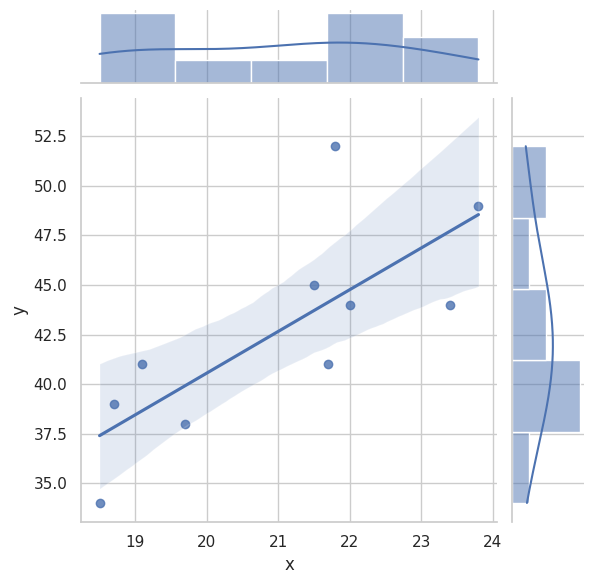

In [ ]:
# Joinplot은 산점도와 함께 각각의 변수에 대한 히스토그램이나 커널밀도추정을 결합하여 변수 간의 관게와 각 변수의 분포를 동시에 탐색할 수 있게 해줌.

# Assuming 'cov_data' is yout DataFrame and it has columns 'x' and 'y'
sns.jointplot(x='x', y='y', data=cov_data, kind='reg')

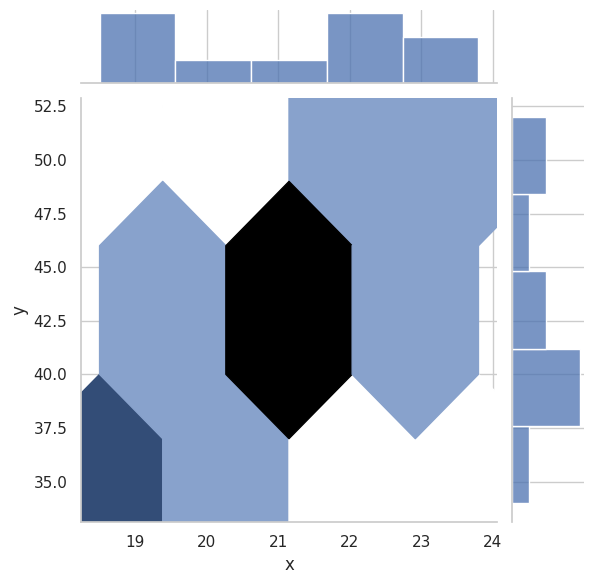

In [ ]:
sns.jointplot(x='x', y='y', data=cov_data, kind='hex')

sns.lmplot과 sns.regplot 차이점

기능적 차이:
- sns.lmplot: 이 함수는 FacetGrid를 사용하여 데이터를 다양한 카테고리별로 분할하여 여러 서브플롯을 만들 수 있다. 이는 데이터의 서브셋에 대한 회귀선을 별도로 그릴 수 있음을 의미.
sns.regplot: 이 함수는 단일 축 객체(ax)에 회귀선을 그리는 데 사용. 간단하고, 한 번에 하나의 관계만 표시.

사용상의 유연성:
- sns.lmplot은 regplot보다 더 많은 매개변수를 제공하여, 데이터를 세분화하고 다양한 방식으로 표시.
- sns.regplot은 더 단순하고 직관적인 옵션을 제공하여, 빠르고 간편하게 선형 회귀선을 그릴 수 있게 한다.

그래픽 표현의 차이:
- sns.lmplot은 내부적으로 FacetGrid를 사용하므로, 플롯의 구성과 스타일을 더 세밀하게 조정할 수 있다.
- sns.regplot은 주로 간단한 선형 관계를 표시하는데 적합하며, 복잡한 그래픽 설정은 제한적.



In [ ]:
# x와 y 열을 데이터 포인트로 사용하고, 카테고리 열에 따라 서로 다른 색상의 선형 회귀선을 그린다.
# 각 카테고리(A,B)에 대한 회귀선이 서로 다른 색상으로 표시
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(10)
data = pd.DataFrame({
    'x': np.random.rand(50),
    'y': np.random.rand(50),
    'category': np.random.choice(['A', 'B'], size=50)
})

In [ ]:
data.head()

,x,y,category
0,0.771321,0.392529,A
1,0.020752,0.093460,A
2,0.633648,0.821106,B
3,0.748804,0.151152,B
4,0.498507,0.384114,A


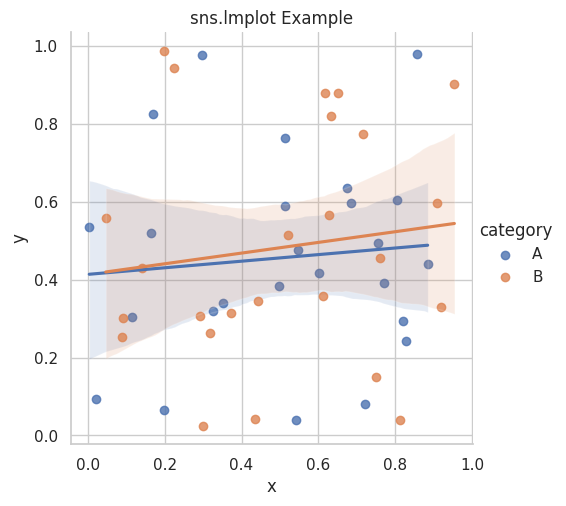

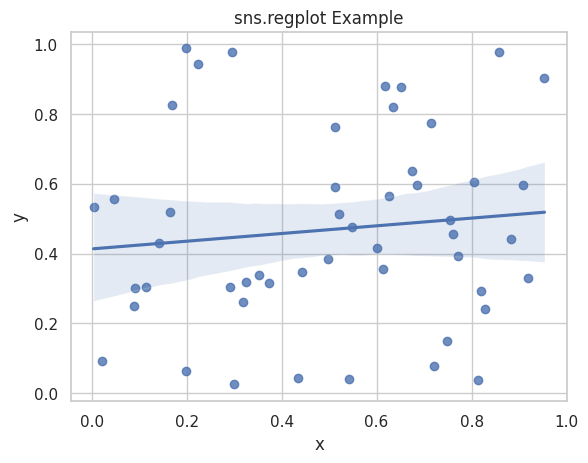

In [ ]:
# sns.lmplot 사용예시
sns.lmplot(x='x' , y='y', data=data, hue='category')
plt.title('sns.lmplot Example')
plt.show()

# sns.regplot 사용예시
sns.regplot(x='x', y='y', data=data)
plt.title('sns.regplot Example')
plt.show()

In [ ]:
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [ ]:
df_auto = pd.read_csv('auto-mpg.csv')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<Axes: xlabel='mpg'>

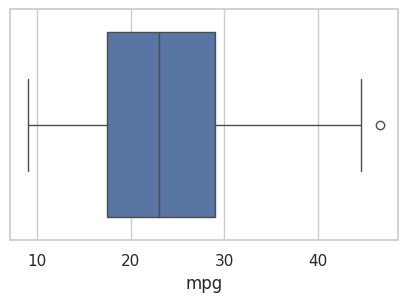

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df_auto, x='mpg')

<Axes: xlabel='mpg'>

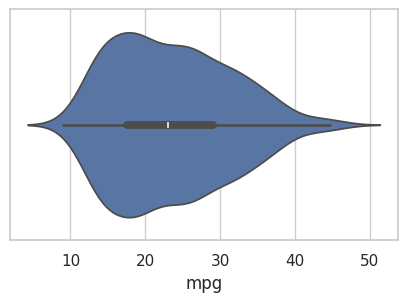

In [ ]:
plt.figure(figsize=(5,3))
sns.violinplot(data=df_auto, x='mpg')

- sns.lineplot() 함수에서는 err_style 매개변수를 이용해 밴드의 스타일을 조정할 수 있습니다.
- 예를 들어, err_style='band'로 설정하면, 투명한 밴드가 그려지고, err_style='bars'로 설정하면, 오차 막대(error bar)가 그려집니다.

<Axes: xlabel='model year', ylabel='mpg'>

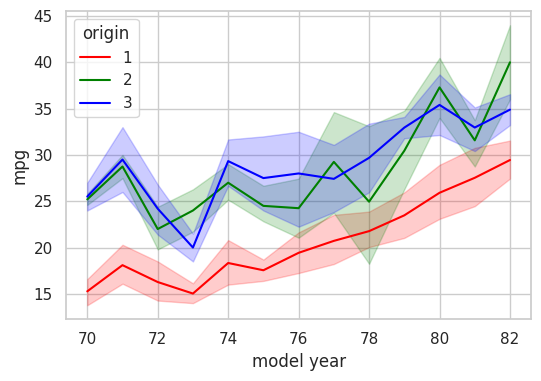

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df_auto, x='model year', y='mpg', hue='origin', err_style='band', palette=['red','green','blue'])

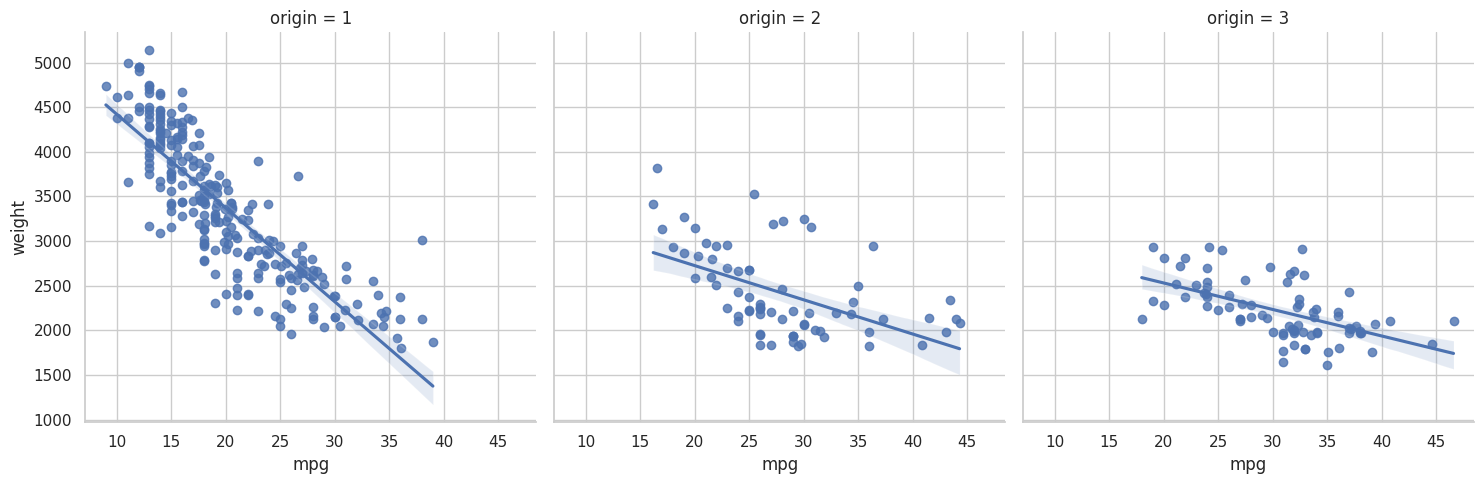

In [ ]:
# 데이터프레임 df_auto 정의 필요 (예: sns.load_dataset('mpg) 사용가능)
# mpg와 weight의 관계, 1행 2열로 표시
# 첫번째 열: 전체 데이터에 대한 그래프

sns.lmplot(x='mpg', y='weight', data=df_auto, col = 'origin', col_wrap=3) # col_wrap=3은 한행에 최대 3개의 그래프 표시하도록 해줌
plt.show()

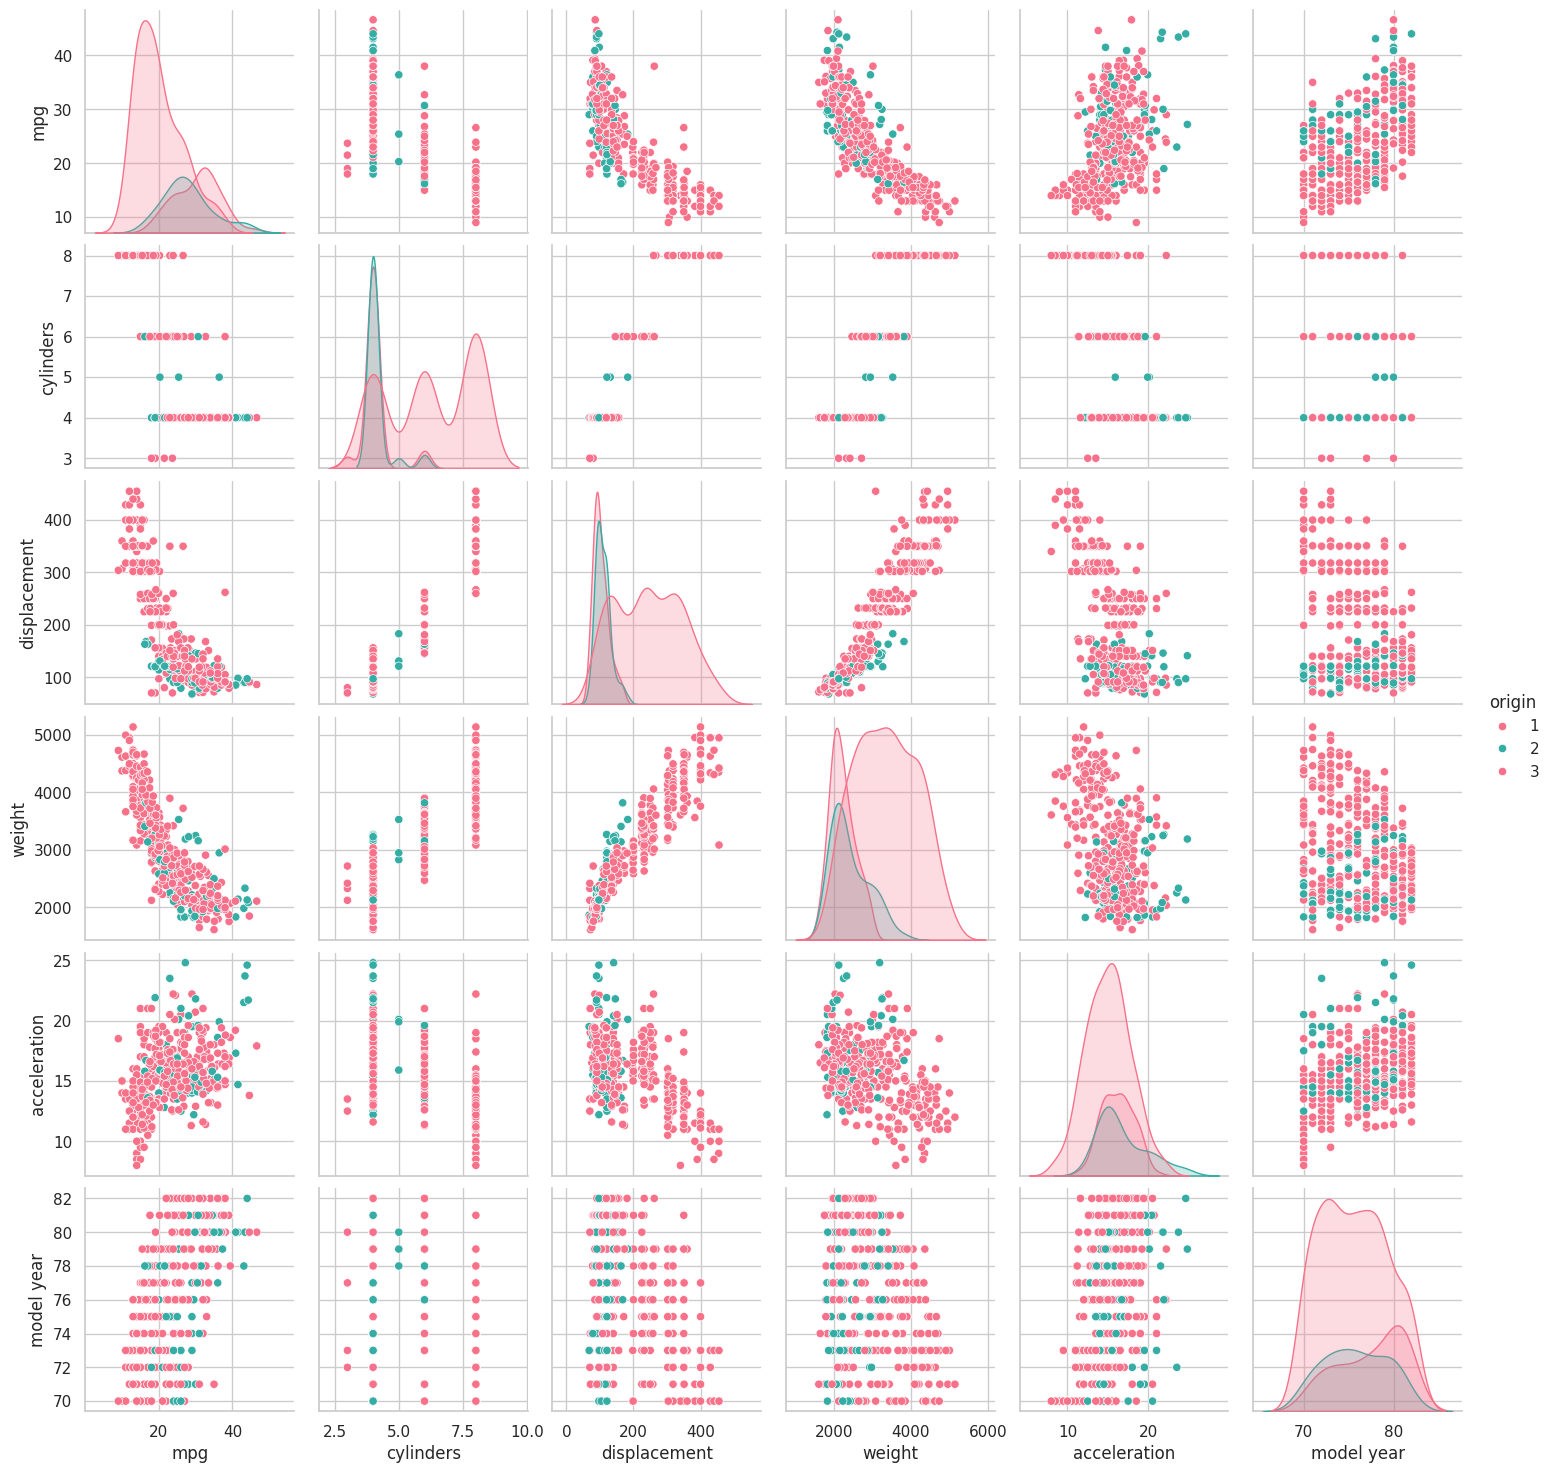

In [ ]:
sns.pairplot(df_auto,hue='origin', palette='husl')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

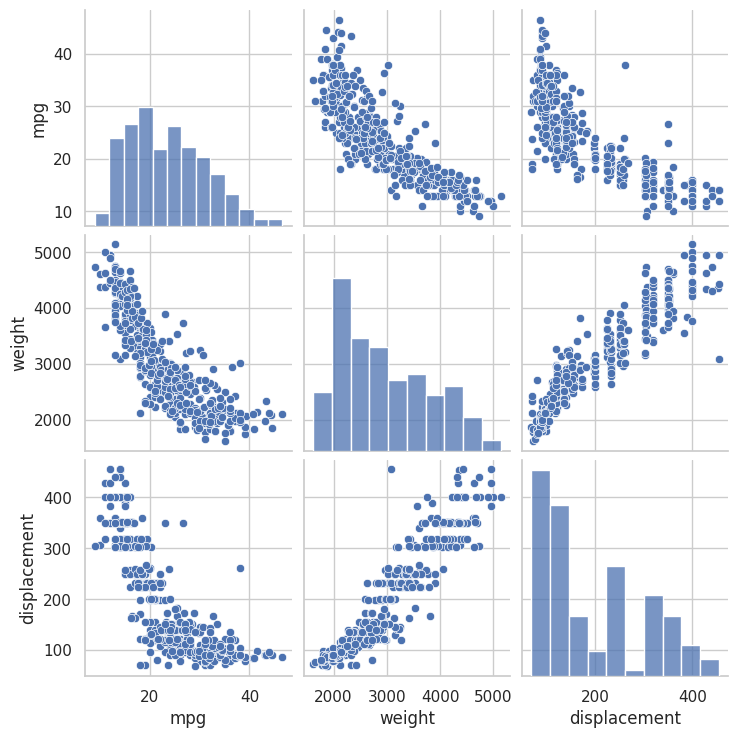

In [ ]:
sns.pairplot(df_auto[['mpg', 'weight', 'displacement']], palette='rainbow')

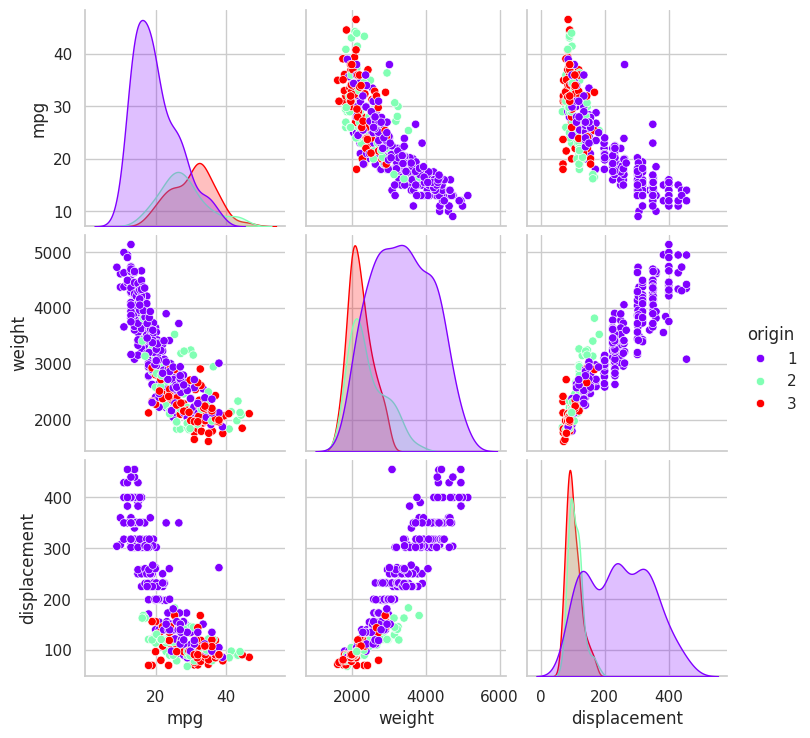

In [ ]:
sns.pairplot(df_auto[['mpg', 'weight', 'displacement','origin']], palette='rainbow', hue= 'origin', diag_kind='kde')

In [ ]:
t_df = sns.load_dataset('titanic')
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [105]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
t_df[['pclass', 'age', 'fare', 'survived']].corr()

,pclass,age,fare,survived
pclass,1.000000,-0.369226,-0.549500,-0.338481
age,-0.369226,1.000000,0.096067,-0.077221
fare,-0.549500,0.096067,1.000000,0.257307
survived,-0.338481,-0.077221,0.257307,1.000000


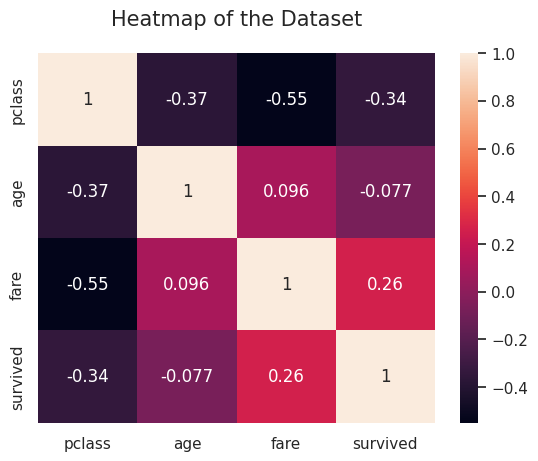

In [ ]:
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(), annot=True)
plt.title('Heatmap of the Dataset', pad=20, fontsize=15)
plt.show()